In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
dataset = pd.read_csv("C:/Users/user/Downloads/Dry_Bean_Dataset.csv")
dataset

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [3]:
dataset.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [4]:
dataset.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

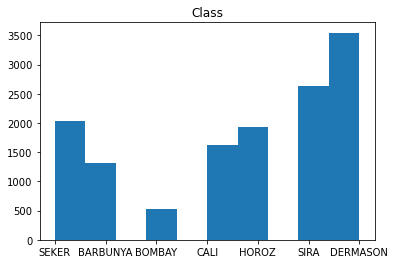

In [5]:
dataset.describe()
plt.hist(dataset['Class'])
plt.title('Class')
plt.show()

In [6]:
dataset['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Class']=le.fit_transform(dataset['Class'])

In [8]:
X = dataset.iloc[:,0:16].values
y = dataset.iloc[:,16].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [9]:
X

array([[2.83950000e+04, 6.10291000e+02, 2.08178117e+02, ...,
        3.14728917e-03, 8.34222388e-01, 9.98723889e-01],
       [2.87340000e+04, 6.38018000e+02, 2.00524796e+02, ...,
        3.56362371e-03, 9.09850506e-01, 9.98430331e-01],
       [2.93800000e+04, 6.24110000e+02, 2.12826130e+02, ...,
        3.04773322e-03, 8.25870617e-01, 9.99066137e-01],
       ...,
       [4.21390000e+04, 7.59321000e+02, 2.81539928e+02, ...,
        1.88827064e-03, 6.76884164e-01, 9.96767264e-01],
       [4.21470000e+04, 7.63779000e+02, 2.83382636e+02, ...,
        1.85202548e-03, 6.68236684e-01, 9.95222420e-01],
       [4.21590000e+04, 7.72237000e+02, 2.95142741e+02, ...,
        1.63981171e-03, 6.16220592e-01, 9.98179623e-01]])

In [10]:
print(Y)

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
X.shape

(13611, 16)

In [12]:
y.shape

(13611,)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()
#softmax, tanh
model.add(Dense(256,input_shape=(16,),activation='relu'))
#model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(7,activation='softmax'))
 
model.compile(Adam(lr=0.0004), loss = 'categorical_crossentropy',metrics=['accuracy'])
#categorical_crossentropy

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 7)                 455       
                                                                 
Total params: 45,959
Trainable params: 45,959
Non-trainable params: 0
_________________________________________________________________


C:\Users\user\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
model_history=model.fit(x=X_train, y=y_train, epochs=70, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/70
341/341 [==============================] - 1s 1ms/step - loss: 399.3939 - accuracy: 0.1605 - val_loss: 443.3656 - val_accuracy: 0.0338
Epoch 2/70
341/341 [==============================] - 0s 1ms/step - loss: 170.9975 - accuracy: 0.1977 - val_loss: 141.8071 - val_accuracy: 0.3037
Epoch 3/70
341/341 [==============================] - 0s 997us/step - loss: 119.4261 - accuracy: 0.2282 - val_loss: 89.4178 - val_accuracy: 0.3195
Epoch 4/70
341/341 [==============================] - 0s 990us/step - loss: 117.9365 - accuracy: 0.2405 - val_loss: 149.3907 - val_accuracy: 0.3944
Epoch 5/70
341/341 [==============================] - 0s 1ms/step - loss: 99.5792 - accuracy: 0.2588 - val_loss: 101.7792 - val_accuracy: 0.3059
Epoch 6/70
341/341 [==============================] - 0s 1ms/step - loss: 67.9627 - accuracy: 0.2997 - val_loss: 37.5482 - val_accuracy: 0.3423
Epoch 7/70
341/341 [==============================] - 0s 1ms/step - loss: 55.4599 - accuracy: 0.3343 - val_loss: 94.8455 - v

Epoch 58/70
341/341 [==============================] - 0s 1ms/step - loss: 1.0612 - accuracy: 0.6871 - val_loss: 0.7430 - val_accuracy: 0.7444
Epoch 59/70
341/341 [==============================] - 0s 1ms/step - loss: 0.8491 - accuracy: 0.7009 - val_loss: 0.8441 - val_accuracy: 0.7040
Epoch 60/70
341/341 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.7397 - val_loss: 0.5854 - val_accuracy: 0.7624
Epoch 61/70
341/341 [==============================] - 0s 1ms/step - loss: 2.1295 - accuracy: 0.6437 - val_loss: 0.5123 - val_accuracy: 0.8090
Epoch 62/70
341/341 [==============================] - 0s 1ms/step - loss: 0.7651 - accuracy: 0.7248 - val_loss: 0.7929 - val_accuracy: 0.7484
Epoch 63/70
341/341 [==============================] - 0s 1ms/step - loss: 0.8371 - accuracy: 0.7282 - val_loss: 2.5006 - val_accuracy: 0.5498
Epoch 64/70
341/341 [==============================] - 0s 1ms/step - loss: 0.8679 - accuracy: 0.7264 - val_loss: 0.4551 - val_accuracy: 0.8402

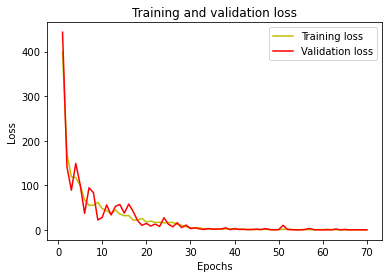

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

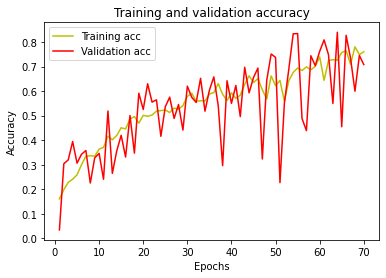

In [16]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.36      0.93      0.52       255
           1       1.00      1.00      1.00        92
           2       0.72      0.06      0.11       350
           3       0.95      0.79      0.86       735
           4       1.00      0.52      0.68       390
           5       0.72      0.96      0.82       376
           6       0.69      0.83      0.75       525

    accuracy                           0.71      2723
   macro avg       0.78      0.73      0.68      2723
weighted avg       0.79      0.71      0.69      2723

[[236   0   0   0   0   2  17]
 [  0  92   0   0   0   0   0]
 [327   0  21   0   0   1   1]
 [  0   0   0 584   0  89  62]
 [ 74   0   8   5 201   0 102]
 [  3   0   0   2   0 361  10]
 [ 18   0   0  25   1  47 434]]
